# Assignment 1 - Question 12

## Setup: Libraries and Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Random seed
seed = 42
np.random.seed(seed)

print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")

NumPy: 2.2.6
Matplotlib: 3.10.8


## Question 12 (a)
Goal: Simulate N = {10, 100} lifetimes from Exponential($\theta _0$) with true rate $\theta _0 = 0.2$.

### Prepare a Random Uniform Distribution

In [2]:
def uniform_dist(n_samples, low=0.0, high=1.0, seed=seed):
    rng = np.random.default_rng(seed)
    return rng.uniform(low, high, n_samples)

# Example
n_samples = 10
data = uniform_dist(n_samples, low=-3.0, high=3.0)
assert n_samples == len(data)
print(f"{len(data)} samples from Uniform distribution: {data}")

10 samples from Uniform distribution: [ 1.64373629 -0.36672936  2.15158752  1.18420817 -2.43493591  2.85373411
  1.56683821  1.71638583 -2.2313182  -0.29768437]


### The Exponential Update

In [3]:
# Exponential update
def exp_update(theta, gradient, learning_rate=0.1):
    return theta * np.exp(-learning_rate * gradient)

### Configurations

In [4]:
theta0 = -0.2 # initial weight
gradients = uniform_dist(100, low=-1.0, high=1.0)

### The Simulation

Final theta after 10 updates: -0.16491935941584984

Final theta after 11 updates: -0.16923647864664154

Final theta after 12 updates: -0.15539092227421694

Final theta after 13 updates: -0.15098356608038488

Final theta after 14 updates: -0.14154513964928608

Final theta after 15 updates: -0.1431561273839617

Final theta after 16 updates: -0.15118255652783463

Final theta after 17 updates: -0.14954107926934

Final theta after 18 updates: -0.16317246053792028

Final theta after 19 updates: -0.15282316172092175

Final theta after 20 updates: -0.14885141109010788

Final theta after 21 updates: -0.14136299563890076

Final theta after 22 updates: -0.14553634157816145

Final theta after 23 updates: -0.13246072956320598

Final theta after 24 updates: -0.12244500575564157

Final theta after 25 updates: -0.11581398161234334

Final theta after 26 updates: -0.12310745053312237

Final theta after 27 updates: -0.12392956187972376

Final theta after 28 updates: -0.13576868630631345

Final theta afte

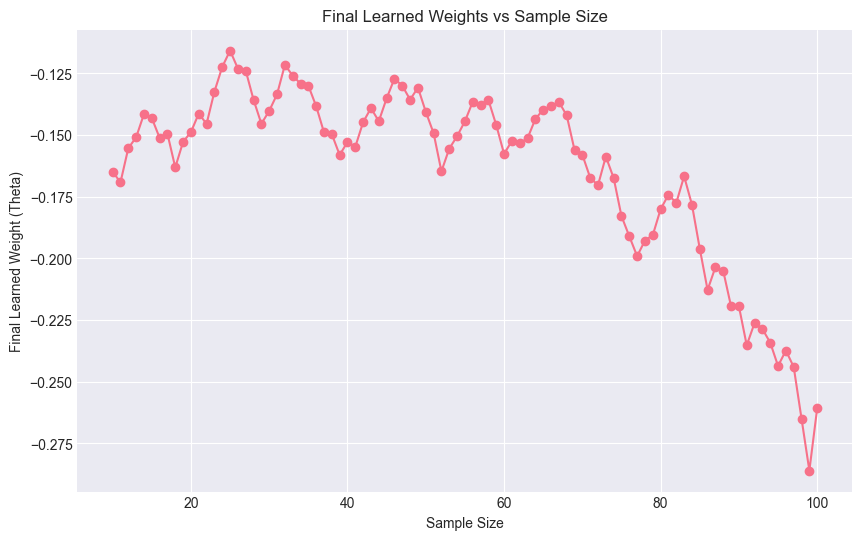

In [5]:
final_thetas = []
for n in range(10, 101): # sample sizes to try
    # Learning
    theta = theta0
    updated_thetas = []
    for gradient in gradients[:n]:
        theta = exp_update(theta, gradient, learning_rate=0.1)
        updated_thetas.append(theta)
    
    final_thetas.append(theta)    
    print(f"Final theta after {n} updates: {theta}\n")

# Plot thetas
plt.figure(figsize=(10, 6))
plt.plot(range(10, 101), final_thetas, marker='o')
plt.title("Final Learned Weights vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Final Learned Weight (Theta)")
plt.grid(True)
plt.show()

## Question 12 (b)
Goal: Compute and print the MLE $\hat{\theta}$ from the simulated data.

**MLE** $= n / \sum_{i=1}^{N} x_i = 1/E[X] $

Sample Size: 10
True theta: -0.2
MLE theta: 1.6766
Sample mean: 0.5964

Sample Size: 11
True theta: -0.2
MLE theta: 1.7364
Sample mean: 0.5759

Sample Size: 12
True theta: -0.2
MLE theta: 1.6525
Sample mean: 0.6052

Sample Size: 13
True theta: -0.2
MLE theta: 1.6444
Sample mean: 0.6081

Sample Size: 14
True theta: -0.2
MLE theta: 1.6039
Sample mean: 0.6235

Sample Size: 15
True theta: -0.2
MLE theta: 1.6354
Sample mean: 0.6115

Sample Size: 16
True theta: -0.2
MLE theta: 1.7023
Sample mean: 0.5874

Sample Size: 17
True theta: -0.2
MLE theta: 1.7079
Sample mean: 0.5855

Sample Size: 18
True theta: -0.2
MLE theta: 1.7968
Sample mean: 0.5565

Sample Size: 19
True theta: -0.2
MLE theta: 1.7519
Sample mean: 0.5708

Sample Size: 20
True theta: -0.2
MLE theta: 1.7426
Sample mean: 0.5738

Sample Size: 21
True theta: -0.2
MLE theta: 1.7164
Sample mean: 0.5826

Sample Size: 22
True theta: -0.2
MLE theta: 1.7475
Sample mean: 0.5722

Sample Size: 23
True theta: -0.2
MLE theta: 1.6961
Sample mean: 

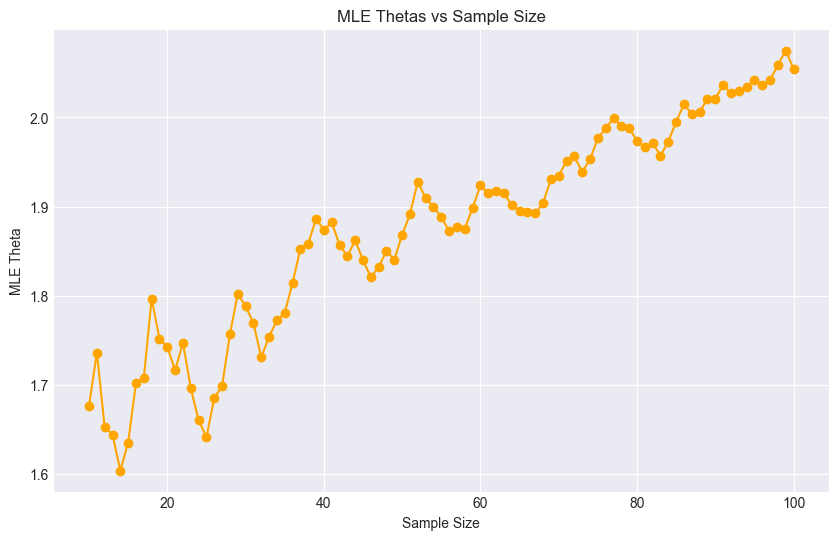

In [6]:
# Compute MLE for each sample size
mle_thetas = []

for n in range(10, 101):
    # Generate samples
    samples = uniform_dist(n, low=0.0, high=1.0, seed=seed)
    
    # Compute MLE: n / sum(X_i) = 1 / E[X]
    theta_mle = 1.0 / np.mean(samples)
    mle_thetas.append(theta_mle)
    
    print(f"Sample Size: {n}")
    print(f"True theta: {theta0}")
    print(f"MLE theta: {theta_mle:.4f}")
    print(f"Sample mean: {np.mean(samples):.4f}\n")

# Plot MLE thetas
plt.figure(figsize=(10, 6))
plt.plot(range(10, 101), mle_thetas, marker='o', color='orange')
plt.title("MLE Thetas vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("MLE Theta")
plt.grid(True)
plt.show()


**Observation**: As the sample size grows, the Maximum Likelihood Estimation (MLE) is enlarged.

## Question 12 (c) - Add a Prior
Goal: Using the given prior, compute the posterior distribution parameters and plot the posterior density. On the same plot,
show the likelihood function (up to a constant). and the prior density for comparison.

### Formulate the Prior

In [7]:
def prior_dist(theta):
    # Exponential Dist
    coeff = theta ** 3
    exponent = -3 * theta
    return coeff * np.exp(exponent)

# Example
prior_dist(0.2)

np.float64(0.004390493088752212)

### Formulate the Likelihood

In [8]:
# Define likelihood function for uniform distribution U(0, theta)
def likelihood(theta_vals, samples):
    n = len(samples)
    max_sample = np.max(samples)
    
    likelihood_vals = np.where(
        theta_vals >= max_sample, # Condition: see if weights controlled by theta can explain data (take max sample)
        (1.0 / theta_vals) ** n, # Sucess case
        0.0 # Else
    )
    return likelihood_vals

# Example
likelihood(np.array([0.5, 1.0, 1.5]), np.array([0.2, 0.4, 0.1]))

array([8.       , 1.       , 0.2962963])

### Run Simulations

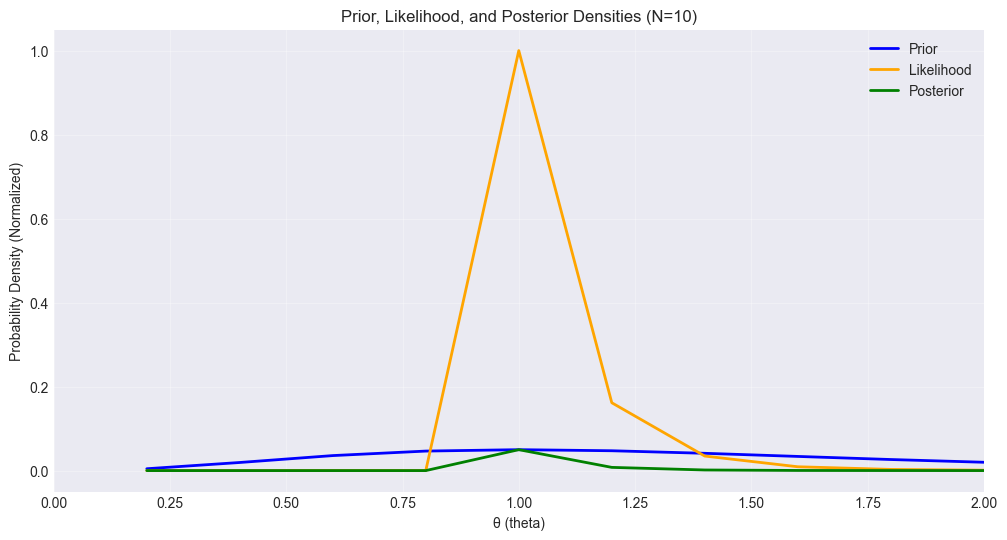

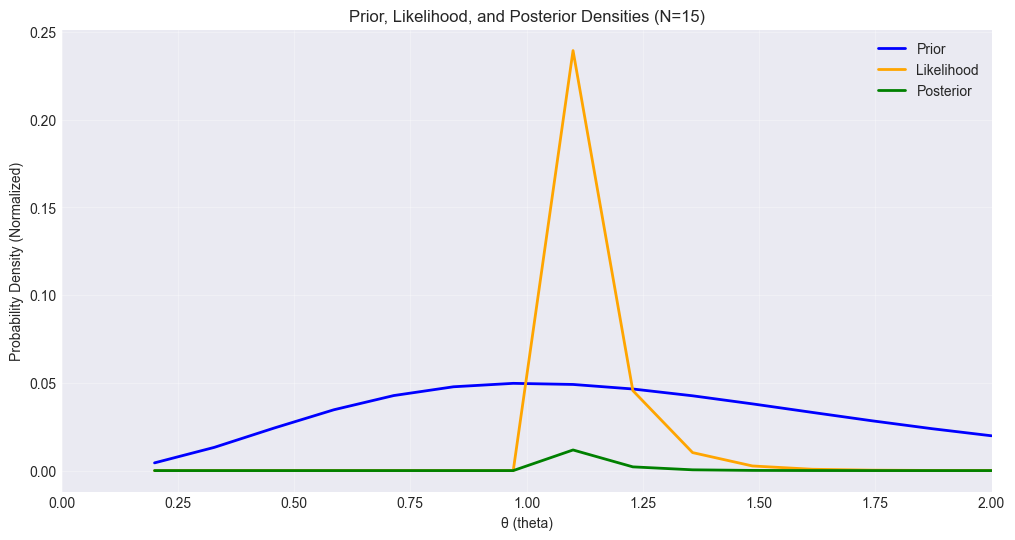

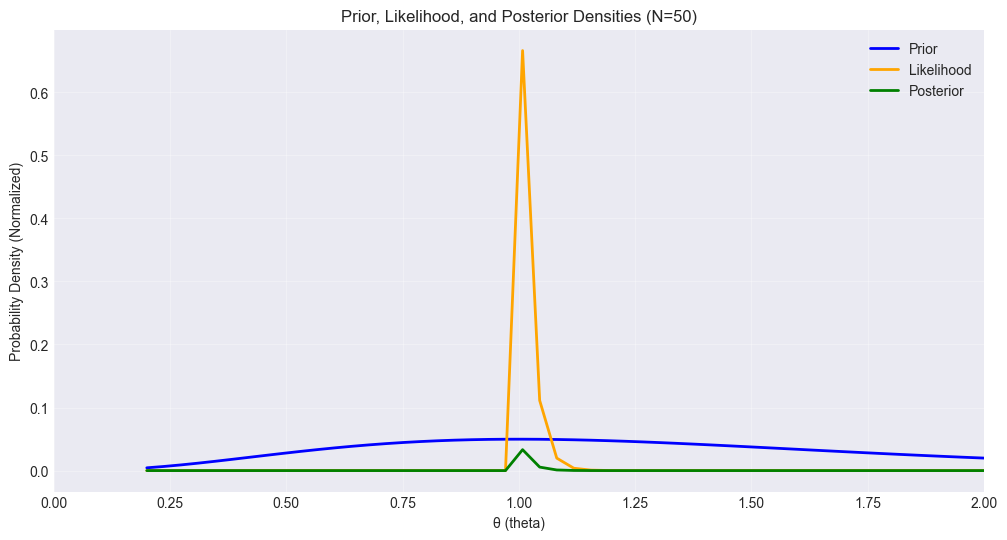

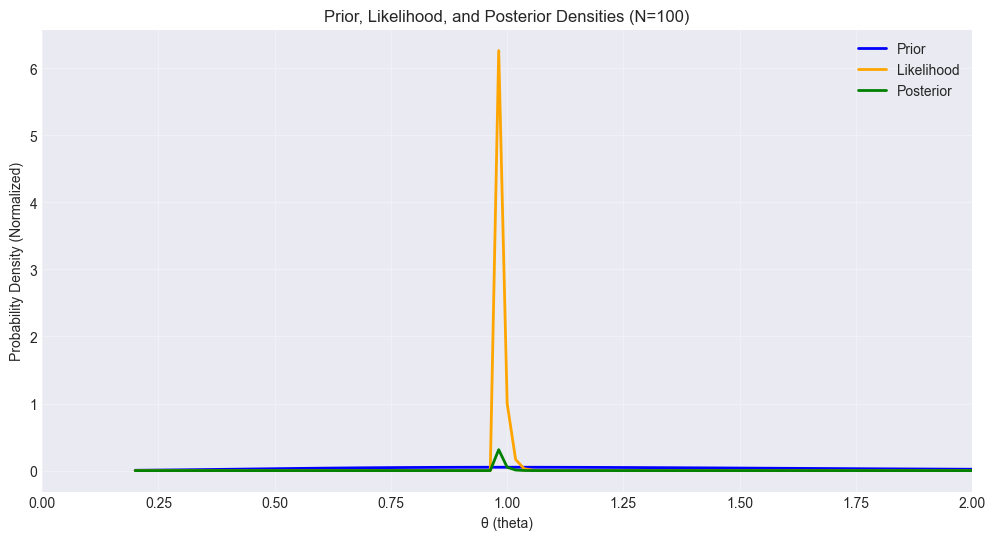

In [9]:
# Plot all three on the same figure
def plot_distribution(theta_range, prior, likelihood, posterior, n):
    plt.figure(figsize=(12, 6))
    plt.plot(theta_range, prior, label='Prior', color='blue', linewidth=2)
    plt.plot(theta_range, likelihood, label='Likelihood', color='orange', linewidth=2)
    plt.plot(theta_range, posterior, label='Posterior', color='green', linewidth=2)
    plt.title(f"Prior, Likelihood, and Posterior Densities (N={n})")
    plt.xlabel("θ (theta)")
    plt.ylabel("Probability Density (Normalized)")
    plt.legend(fontsize=10, loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 2.0)
    plt.show()

selected_samples_plot = [10, 15, 50, 100]

for n in range(10, 101):
    # Generate samples
    samples = uniform_dist(n, low=0.0, high=1.0, seed=seed)

    # For simplicity, MLE for uniform U(0, theta) is max(samples)
    max_sample = np.max(samples)
    theta_mle_viz = max_sample

    # Prior
    theta0 = 0.2
    theta_range = np.linspace(theta0, 2.0, n)

    # Compute prior, likelihood, and posterior
    prior_vals = prior_dist(theta_range)
    likelihood_vals = likelihood(theta_range, samples)

    # Posterior = likelihood * prior
    posterior = likelihood_vals * prior_vals

    if n in selected_samples_plot:
        plot_distribution(theta_range, prior_vals, likelihood_vals, posterior, n)



## Question 12 (d)
We've found a theoretically conjugate **posterior** in question 11 (a). 

Goal: Discuss in 3–4 sentences whether the posterior is consistent with the theoretical conjugacy behavior derived.

### Observations
#### Touching Spikes
When the sample size is small enough ($N=10$), the posterior 
with the highest probability density could touch the peak of the prior's distribution,
but not the likelihood. In fact, the maximum likelihood spikes to a point close to 1, 
whereas the rest only attains a point below 0.2.

### Expectation
Theoretically, conjugacy is defined when $ posterior = likelihood * prior $.

### Explaination
From the chosen graph where sample size $N=10$, looking at the highest density points,
if posterior = prior, with a positively large likelihood, the product will never be identical to posterior.

### Conclusion
Posterior is **NOT** conjugate to the theoretical derivation as well.